# Introduction to Image Processing

Guillaume Lemaitre - Fabrice Meriaudeau

## Introduction to scikit-image

All redundant modules used during this practise can be entered in the following cell:

In [1]:
%matplotlib inline
%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

Pretty printing has been turned OFF


### Image in skimage

First, you need to understand how to deal with images.

In this regard, you will need to refer to two main modules of *skimage*. The first module will give all the information about [input-output](http://scikit-image.org/docs/dev/api/skimage.io.html) in order to read, write, and show image. The second module is as important and refers to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) which allow you to know what is the data type of the images.

#### IO module

In this part, you will rely on the module **io** of the `skimage`. This module can be imported as:

In [12]:
from skimage import io

Now, any function of this module can be called by `io.name_of_the_function`. See the following [webpage](http://scikit-image.org/docs/dev/api/skimage.io.html) to know all the functions available and the arguments of each of them.

##### imread() and imshow()

We will first play with the functions `io.imread()` and `io.imshow()` in order to read and show images. Refer to the documentation to know about the input and output arguments associated with this function. 

The first task will be to read the grayscale image called `lena-grey.bmp` and show it.

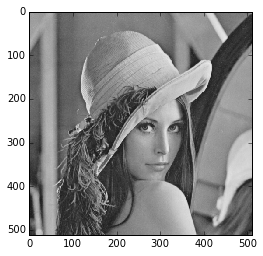

In [18]:
# Just to not make any mistakes the path is given here
filename = './images/lena-grey.bmp'

# Now read the image and display it
lena_im = io.imread(filename)

# Show Lena
io.imshow(lena_im)

In order to understand, the data type of this image, you can print the shape and data type of the image read. Refer to function [`shape()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [`dtype()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html) from the `numpy` library.

In [22]:
# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im.shape, lena_im.dtype)

The shape of the image is (512, 512) and the data type is uint8


The `io.imshow()` function is probided by the `skimage` library. However, it is interesting to know that this function is heritated from the very well known `matplotlib` library. This library has been imported in the preamble of this document and can be called with the prefix `plt`. For instance we can show an image as:

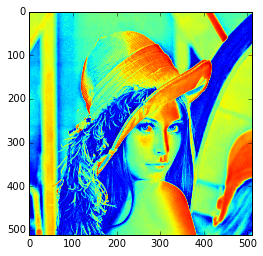

In [19]:
# Show the same image using matplotlib library
plt.imshow(lena_im)

You can see that this image is displayed with false color. Each gray level is replaced by a given color. In this specific case, bright color are represented by red and dark color by blue. This mapping is known as `colormap`. To obtain similar results than in `skimage`, we need to apply a grey colormap. More information about colormap can be found [here](http://matplotlib.org/examples/color/colormaps_reference.html).


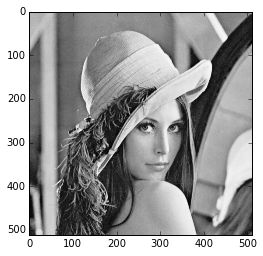

In [21]:
# Show the same image using matplotlib library and a grey colormap
plt.imshow(lena_im, cmap=cm.Greys_r)

You can do the same manipulation and open a color image using the file `vibot-color.jpg`

The shape of the image is (301, 222, 3) and the data type is uint8


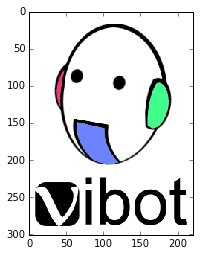

In [23]:
# Read the Vibot image which is a color image
filename = './images/vibot-color.jpg'
vibot_im = io.imread(filename)

# Print information about the shape of the image and type
print 'The shape of the image is {} and the data type is {}'.format(vibot_im.shape, vibot_im.dtype)

# Show the image
io.imshow(vibot_im)

Checking the documentation of the function `imread`, open the previous color image as a grey scale image.

The shape of the image is (301, 222) and the data type is float64


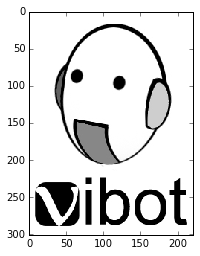

In [24]:
# Read the Vibot image which is a color image
filename = './images/vibot-color.jpg'
vibot_im = io.imread(filename, as_grey=True)

# Print information about the shape of the image and type
print 'The shape of the image is {} and the data type is {}'.format(vibot_im.shape, vibot_im.dtype)

# Show the image
io.imshow(vibot_im)

Observe attentively the change of the data type.

##### Data type

It is important to understand which type of data do you obtain once the image is loaded. Subsequent algorithm will require a certain type (*ie.*, float, unsigned int) included in a certain range. That is why, you need to refer to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) in order to perform the right conversion between types.

Re-open the data from the grey-scale image `lena-grey.bmp` and print the matrix and the type which were loaded by default. 

In [26]:
# Just to not make any mistakes the path is given here
filename = './images/lena-grey.bmp'

# Now read the image and display it
lena_im = io.imread(filename)

# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im.shape, lena_im.dtype)

print lena_im

The shape of the image is (512, 512) and the data type is uint8
[[162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 ..., 
 [ 43  43  50 ..., 104 100  98]
 [ 44  44  55 ..., 104 105 108]
 [ 44  44  55 ..., 104 105 108]]


A set of functions allows to make automatic conversion of type and range and can be called as `img_as_type()`. 

Usually, algorithms expect images as float type in the range [0.0, 1.0]. However, the previous data were coded with 8-bits unsigned integer. Make the conversion to obtain float in the range [0.0, 1.0].

In [28]:
# Import the utility function
from skimage import img_as_float

# Make the conversion
lena_im_float = img_as_float(lena_im)

# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im_float.shape, lena_im_float.dtype)

print lena_im_float

The shape of the image is (512, 512) and the data type is float64
[[ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 [ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 [ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 ..., 
 [ 0.16862745  0.16862745  0.19607843 ...,  0.40784314  0.39215686
   0.38431373]
 [ 0.17254902  0.17254902  0.21568627 ...,  0.40784314  0.41176471
   0.42352941]
 [ 0.17254902  0.17254902  0.21568627 ...,  0.40784314  0.41176471
   0.42352941]]


From now, you are good to go in the world of digital image processing. However, always take care about the type of data you are dealing with and what results you are expecting from the different processing.

### Basic transformation functions

First, we will dig into the different basic transformation functions which allows to improve the contrast of grey scale images. All these functions are part of the `exposure` module of `skimage`.

In [29]:
# We can import this module now
from skimage import exposure

As previously done with the module `io`, you can use any function of this module using `exposure.name_of_the_function()`.

#### Log transformations

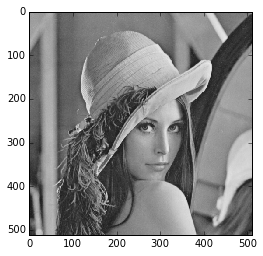

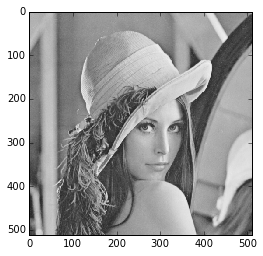

In [40]:
# Apply a logarithm transformation to the input image
gain = 1.
lena_im_log = exposure.adjust_log(lena_im_float, gain=gain)

# Show the resulting image
plt.figure()
io.imshow(lena_im_float)
plt.figure()
io.imshow(lena_im_log)

# Plot the histogram to see the difference
#plt.figure()
#plt.hist(lena_im_log.flatten(), 256, range=(0.0,1.0), fc='k', ec='k')
